#**Practice Number 1**

# **Q1**

**In this exercise, we are looking for the implementation of a complete decision tree for the purpose of multi-class classification**

so let's write the code of tree class, starting with describing a node class:

In [15]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



In [ ]:
class node:
  def __init__(self ,parent, left, right , values , column, threshhold):
    self.parent:node = parent
    self.left:node  = left
    self.right:node = right
    self.values:np.ndarray = values
    self.column:int = column
    self.threshhold:float = threshhold

  def is_leaf(self):
    if self.values is None:
      return False
    return True

the Decision tree code:

In [ ]:
class DecisionTree:
    # Multiclass Decision Tree classifier

    def __init__(self, min_samples_split=2, max_depth=5, n_features=None ):
        """
        Initialize the Decision Tree model.
        """
        self.n_features = n_features
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.tree = node(None, None, None, None, None, None) # self.root=None
        self.number_of_classes = -1
        self.classes = None

    def fit(self, X, Y, max_depth=5, kind='best', sample_size=20):
        """
        Fit the Decision Tree model to the provided data.

        Args:
        - X: Input features.
        - Y: Labels.
        - max_depth: Maximum depth of the decision tree.
        - kind: 'best' for best split(check all the possible splits),
         'random' for random split(check sample_size candidates for the splits on each column).
        - sample_size: Number of random samples to consider for splitting (for 'random' kind).

        Returns:
        - None

        Example:
        >>> tree = DecisionTree()
        >>> X = np.array([[1, 2], [2, 3], [3, 4]])
        >>> Y = np.array([0, 1, 2])
        >>> tree.fit(X, Y, max_depth=5, kind='best', sample_size=20)
        """
        self.n_features=X.shape[1]
        self.classes = np.unique(Y)
        self.number_of_classes = len(self.classes)
        self.tree = self._tree_builder(X, Y, max_depth, kind, sample_size)


    def predict(self, X):
        """
        Predict class labels for input data.

        Args:
        - X: Input features for prediction.

        Returns:
        - Predicted class labels.

        Example:
        >>> tree = DecisionTree()
        >>> X = np.array([[2, 3], [3, 4]])
        >>> predicted_labels = tree.predict(X)
        """
        predicted_labels = []
        for x in X:
            label = self._predict_tree(self.tree, x)
            predicted_labels.append(label)
        return np.array(predicted_labels)

    def _predict_tree(self, tree, X):
        """
        Predict class labels for input data using the decision tree.
        This function can be used recursively to buid the predictions.

        Args:
        - tree: Current decision tree node.
        - X: Input data for prediction.

        Returns:
        - Predicted class labels.

        Example:
        >>> tree = DecisionTree()
        >>> node = tree.tree
        >>> X = np.array([[2, 3], [3, 4]])
        >>> predicted_labels = tree._predict_tree(node, X)
        """
        if tree.is_leaf():
            return np.argmax(tree.values)
        if X[tree.column] <= tree.threshold:
            return self._predict_tree(tree.left, X)
        else:
            return self._predict_tree(tree.right, X)

    def _tree_builder(self, tree, X, Y, depth):
        """
        Build the Decision Tree recursively.

        Args:
        - tree: Current decision tree node.
        - X: Input features for the current node.
        - Y: Labels for the current node.
        - depth: Current depth in the tree.

        Returns:
        - None

        Example:
        >>> tree = DecisionTree()
        >>> node = tree.tree
        >>> X = np.array([[1, 2], [2, 3], [3, 4]])
        >>> Y = np.array([0, 1, 0])
        >>> tree._tree_builder(node, X, Y, depth=1)
        """
        if depth == 0 or len(np.unique(Y)) == 1:
            self._build_leaf(tree, Y)
        else:
            if kind == 'best':
                best_row, best_column, best_threshold = self._find_split(X, Y)
            elif kind == 'random':
                best_row, best_column, best_threshold = self._find_random_split(X, Y, sample_size)
            left_indices = X[:, best_column] <= best_threshold
            right_indices = X[:, best_column] > best_threshold
            left_node = node(tree, None, None, None, None, None)
            right_node = node(tree, None, None, None, None, None)
            tree.column = best_column
            tree.threshold = best_threshold
            tree.left = left_node
            tree.right = right_node
            self._tree_builder(left_node, X[left_indices], Y[left_indices], depth - 1, kind, sample_size)
            self._tree_builder(right_node, X[right_indices], Y[right_indices], depth - 1, kind, sample_size)


    def _check_leaf(self, Y):
        return len(np.unique(Y)) == 1

    def _build_leaf(self, node, Y):
        """
        Build a leaf node and assign class probabilities to node.values
        according to Y values in this node.
        The values must be an np.ndarray which the first index is
        the probability of the sample in this node to belong to
        class with label=self.classes[0] and so on for other indexes.

        Args:
        - node: Current decision tree node which is going to be a leaf.
        - Y: Labels for the current node.

        Returns:
        - None

        Example:
        >>> tree = DecisionTree()
        >>> node = tree.tree
        >>> Y = np.array([0, 1, 0])
        >>> tree._build_leaf(node, Y)
        """
        node.values = np.zeros(self.number_of_classes)
        for y in Y:
            node.values[y] += 1
        node.values /= len(Y)

    def _calculate_entropy(self, labels):
        """
        Calculate the entropy of a set of labels.

        Args:
        - labels: Input labels.

        Returns:
        - Entropy value.

        Example:
        >>> tree = DecisionTree()
        >>> labels = np.array([0, 1, 0, 1, 1])
        >>> entropy = tree._calculate_entropy(labels)
        """
        unique_labels, counts = np.unique(labels, return_counts=True)
        probabilities = counts / len(labels)
        entropy = -np.sum(probabilities * np.log2(probabilities))
        return entropy

    def _information_gain(self, X, Y, column, row):
        """
        Calculate information gain for a potential split.

        Args:
        - X: Input features for the split.
        - Y: Labels for the split.
        - column: Column index for the split.
        - row: row index for the split.

        Returns:
        - Information gain value.

        Example:
        >>> tree = DecisionTree()
        >>> X = np.array([[1, 2], [2, 3], [3, 4]])
        >>> Y = np.array([0, 1, 0])
        >>> gain = tree._information_gain(X, Y, column=1, threshold=2)
        """
        total_entropy = self._calculate_entropy(Y)
        left_indices = X[:, column] <= threshold
        right_indices = X[:, column] > threshold
        left_entropy = self._calculate_entropy(Y[left_indices])
        right_entropy = self._calculate_entropy(Y[right_indices])
        weighted_entropy = (len(Y[left_indices]) / len(Y)) * left_entropy + (len(Y[right_indices]) / len(Y)) * right_entropy
        information_gain = total_entropy - weighted_entropy
        return information_gain

    def _find_split(self, X, Y):
        """
        Find the best or best random split for the decision tree.
        Remember that there are two versions of this function according to the
        'kind' and 'sample_size' arguments that are provided to the constructor.
        The random samples must be in the range of the values in the dataset and
        they must be unique. The sample_size is an upper bound, as
        the unique values might be less than sample_size.


        Args:
        - X: Input features for the split.
        - Y: Labels for the split.

        Returns:
        - Tuple (best_row, best_column) representing the chosen split.

        Example:
        >>> tree = DecisionTree()
        >>> X = np.array([[1, 2], [2, 3], [3, 4]])
        >>> Y = np.array([0, 1, 0])
        >>> split = tree._find_split(X, Y)
        """
        best_information_gain = 0
        best_column = 0
        best_threshold = 0
        for column in range(X.shape[1]):
            unique_values = np.unique(X[:, column])
            for threshold in unique_values:
                information_gain = self._information_gain(X, Y, column, threshold)
                if information_gain > best_information_gain:
                    best_information_gain = information_gain
                    best_column = column
                    best_threshold = threshold
        return best_column, best_threshold


    def _find_random_split(self, X, Y, sample_size):
        best_information_gain = 0
        best_column = 0
        best_threshold = 0
        for _ in range(sample_size):
            column = np.random.randint(0, X.shape[1])
            threshold = np.random.choice(np.unique(X[:, column]))
            information_gain = self._information_gain(X, Y, column, threshold)
            if information_gain > best_information_gain:
                best_information_gain = information_gain
                best_column = column
                best_threshold = threshold
        return best_column, best_threshold

##**b)**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
X_data = np.load('x.npy')
Y_data = np.load('y.npy')

In [ ]:
print(X_data.shape)
print(Y_data.shape)

(4500, 40)
(4500,)


In [ ]:
print(X_data[0])
print(Y_data[0])

[-2.28087808  1.40445145 -0.99437421  0.99602129  0.05256949 -0.03084608
  1.07045019  0.21069894 -0.78678522  0.45719949 -1.24953476 -0.47939487
  0.74030493 -1.00633932  1.35236668  1.14646061 -0.38411122 -0.75723019
  0.15390891  0.2572354   2.12006825  1.0670231  -0.72455692 -0.38260781
  0.0326524  -0.78081216  0.162962   -0.53618321  0.91135563 -0.49351301
 -0.26600688 -0.78670282  0.33922651 -0.51411719  0.09354478  0.18864781
 -0.60825539 -1.36477942 -1.37765935  1.00076637]
1


**First let's create and check the results for some models of DecisionTreeClassifier**

In [ ]:
##1: create one with the default values which are:
#    criterion: 'gini', splitter: 'best', max_depth: None, min_samples_split: 2, min_samples_leaf: 1
#    random_state: None (when using best splitter it is not much useful but we set it to ensure having reproducibility),
#    and some other hyperparameters
#    for precise results we set the random_state to 42!
dt1 = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt1.fit(X_data, Y_data)


##2: the second one is going to have some different hyperparameters but it is still using gini
dt2 = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)

dt2.fit(X_data, Y_data)


##3: now creating another model with information gain which we are going to have more focus on it
dt3 = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    random_state=42
)

dt3.fit(X_data, Y_data)


##4: finally creating a model with information gain having max_depth set to 10
dt4 = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)

dt4.fit(X_data, Y_data)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       random_state=42)

Using the trained classifiers to make predictions on the test data.
Note that we used all of our data for training and also the prediction is going to be about those data.

In [ ]:
# Use the trained classifiers to make predictions on the test data
# note ht
predictions1 = dt1.predict(X_data)
predictions2 = dt2.predict(X_data)
predictions3 = dt3.predict(X_data)
predictions4 = dt4.predict(X_data)


It is time to checkout our models accuracy

In [ ]:
accuracy1 = accuracy_score(Y_data, predictions1)
print("dt1's Accuracy using gini and max_depth=None:    ", accuracy1)

accuracy2 = accuracy_score(Y_data, predictions2)
print("dt2's Accuracy using gini and max_depth=10:    ", accuracy2)

accuracy3 = accuracy_score(Y_data, predictions3)
print("dt3's Accuracy using entropy and max_depth=None:    ", accuracy3)

accuracy4 = accuracy_score(Y_data, predictions4)
print("dt4's Accuracy using entropy and max_depth=10:    ", accuracy4)


dt1's Accuracy using gini and max_depth=None:     1.0
dt2's Accuracy using gini and max_depth=10:     0.8564444444444445
dt3's Accuracy using entropy and max_depth=None:     1.0
dt4's Accuracy using entropy and max_depth=10:     0.8711111111111111


#### *the results should be like this:*

*   dt1's Accuracy using gini and max_depth=None:       1.0
---
*   dt2's Accuracy using gini and max_depth=10:         0.8564444444444445
---
*   dt3's Accuracy using entropy and max_depth=None:    1.0
---
*   dt4's Accuracy using entropy and max_depth=10:      0.8711111111111111

#### Now we can use different hyperparameters using all of our data but is is a bit useless becuase when you are using all of your data, you don't have a measure for testing how well your model is doing. For example it in the question 1.b, it is written that we should try different paramters for these models and see which is best. But, when we are using all of our data, without considering the time problems, having a model with parameters like **max_depth=None** can fit all the data and accuracy is 100%! So I do this part of the parameter setting when I have split the data and have a test set.


####First, let's split our data. For testing the parameters, as our data's lentgh is just 4500, we use a **[60, 20, 20]** data set splitting.

In [ ]:
X_train, X_rest, Y_train, Y_rest = train_test_split(X_data, Y_data, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_rest, Y_rest, test_size=0.5, random_state=42)

In [ ]:
print("X_train size:" + '    ' + str(X_train.shape) )
print("X_val size:" + '      ' + str(X_val.shape) )
print("X_test size:" + '     ' + str(X_test.shape) )

X_train size:    (2700, 40)
X_val size:      (900, 40)
X_test size:     (900, 40)


now let's check different **max_dapth** values

In [ ]:
def find_best_max_depth(X_train, y_train, X_val, y_val, max_depth_values):
    best_depth = None
    best_val_accuracy = 0
    best_model = None
    history = {'train': [], 'val': []}  # Dictionary to store training and validation accuracies for different depths

    for depth in max_depth_values:
        dt = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)

        # Train and then predicting both train set and validation set
        dt.fit(X_train, y_train)
        y_train_pred = dt.predict(X_train)
        training_accuracy = accuracy_score(y_train, y_train_pred)
        y_val_pred = dt.predict(X_val)
        validation_accuracy = accuracy_score(y_val, y_val_pred)
        history['train'].append(training_accuracy)
        history['val'].append(validation_accuracy)
        # using the for returning the best model, it's depth, and it's accuracy
        if validation_accuracy > best_val_accuracy:
            best_val_accuracy = validation_accuracy
            best_depth = depth
            best_model = dt

    return best_depth, best_model, best_val_accuracy, history


now let's use the function

In [ ]:
max_depth_values = [i for i in range(2, 50, 2)]
best_max_depth, best_model, best_accuracy, history = find_best_max_depth(X_train, Y_train, X_val, Y_val, max_depth_values)
print(f"Best Max Depth: {best_max_depth}")
print(f"Validation Accuracy with Best Model: {best_accuracy:.4f}")

Best Max Depth: 6
Validation Accuracy with Best Model: 0.6689


But let's checkout the history deeply

Now let's visualizing the history...

Oh, but wait! in the **max_depth_values**, we have a None value! And we can not use it for plt.xticks. So we do a trick here!

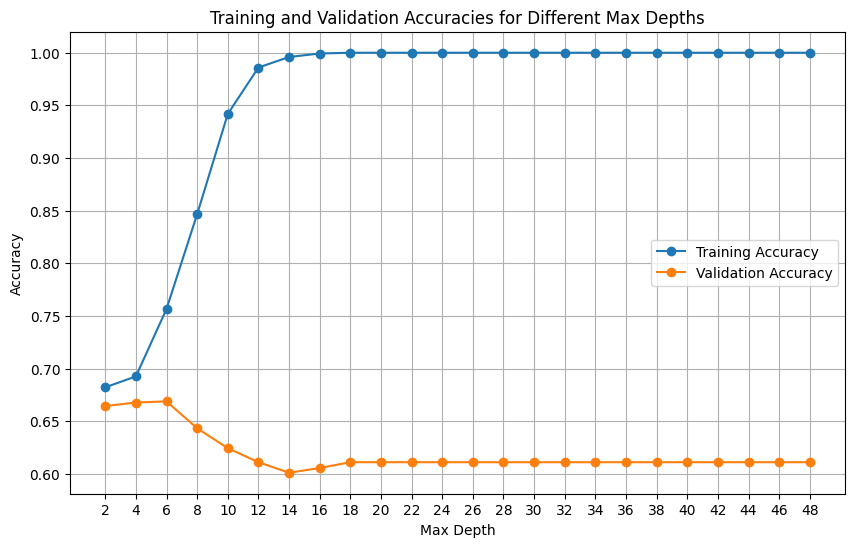

In [ ]:
import matplotlib.pyplot as plt

max_depth_values = [depth if depth is not None else np.inf for depth in max_depth_values]
# Plotting training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, history['train'], marker='o', label='Training Accuracy')
plt.plot(max_depth_values, history['val'], marker='o', label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies for Different Max Depths')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.show()

now let's check the best hyperparameter for **min_sample_leaf**

Best Min Samples Leaf: 3
Validation Accuracy with Best Model: 0.6167


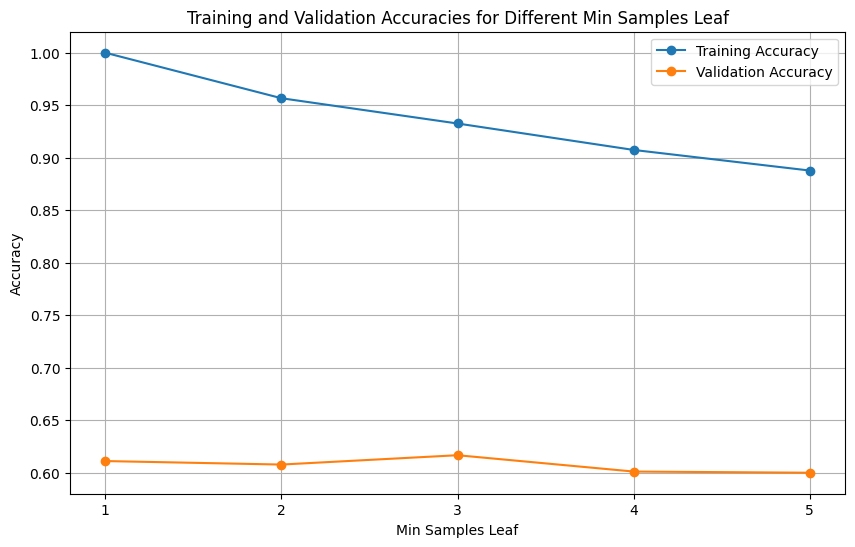

In [ ]:
def find_best_min_samples_leaf(X_train, y_train, X_val, y_val, min_samples_leaf_values):
    best_min_samples_leaf = None
    best_val_accuracy = 0
    best_model = None
    history = {'train': [], 'val': []}

    for min_samples_leaf in min_samples_leaf_values:
        dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=42)
        dt.fit(X_train, y_train)
        y_train_pred = dt.predict(X_train)
        training_accuracy = accuracy_score(y_train, y_train_pred)
        y_val_pred = dt.predict(X_val)
        validation_accuracy = accuracy_score(y_val, y_val_pred)
        history['train'].append(training_accuracy)
        history['val'].append(validation_accuracy)
        if validation_accuracy > best_val_accuracy:
            best_val_accuracy = validation_accuracy
            best_min_samples_leaf = min_samples_leaf
            best_model = dt

    return best_min_samples_leaf, best_model, best_val_accuracy, history

min_samples_leaf_values = [1, 2, 3, 4, 5]
best_min_samples_leaf, best_model, best_accuracy, history = find_best_min_samples_leaf(X_train, Y_train, X_val, Y_val, min_samples_leaf_values)

print(f"Best Min Samples Leaf: {best_min_samples_leaf}")
print(f"Validation Accuracy with Best Model: {best_accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, history['train'], marker='o', label='Training Accuracy')
plt.plot(min_samples_leaf_values, history['val'], marker='o', label='Validation Accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies for Different Min Samples Leaf')
plt.xticks(min_samples_leaf_values)
plt.legend()
plt.grid(True)
plt.show()


**So we saw that max_depth of 6 and min leaf from 1 to 3 can have a better performance on the validation set**. So let's see the resaults on the test set

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, max_depth=6, random_state=42)
dt.fit(X_train, Y_train)
y_pred = dt.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_pred)
print(f"Test Accuracy for a decision tree with max_depth-6 and min_samples_leaf=2: {test_accuracy:.4f}")


Test Accuracy for a decision tree with max_depth-6 and min_samples_leaf=2: 0.6689


##**C)**

now it's time to use random forest
we use a random forest having 100 trees with random state 42

In [ ]:
#implementing the random forest and then fitting the data
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

After training, let's use our X_val and see what does the random forest predict. these data have not been used to be trained by the model before, so it can be a nice scale for our model's predication level  

In [ ]:
print("X_val's shape: " + str(X_val.shape))
Y_pred_val = random_forest.predict(X_val)

X_val's shape: (900, 40)


now it's time to compare our predictions with our real data using the accuracy_score that have been imported

In [ ]:
accuracy = accuracy_score(Y_val, Y_pred_val)
print(f"Validation Accuracy with Random Forest: {accuracy}")

Validation Accuracy with Random Forest: 0.7022222222222222


As described in the question, we have to use learning curve for checking out model's perfomance.
But one nice idea is as leaning curve is going to make train and test set it self, I use all my data and pass it to the learning_curve function

In [ ]:
print("X_data's shape vs X_train shape")
print("X_data's shape: " + str(X_data.shape))
print("X_train's shape: " + str(X_train.shape))

X_data's shape vs X_train shape
X_data's shape: (4500, 40)
X_train's shape: (2700, 40)


as given in the question, we use **25%, 50%, 75%, and 100%** of our data.
Also I set the "cv" (which is the cross-validation) parameter of the leaning_curve model to **5**, so that this model does the evaluation for each training set, 10 times and each time it uses 1/5 of the data for validation set and testing the model and 4/5 for training it. Also our training_size array has lenght of 4. So the returning output for train_scores and val_scores should be an array of shape [4, 5]

After all these explanations, let's start using the learning_curve!

In [ ]:
from sklearn.model_selection import learning_curve

model = RandomForestClassifier(n_estimators=100, random_state=42)

train_sizes, train_scores, val_scores = learning_curve(model, X_data, Y_data, cv=5  , scoring='accuracy', train_sizes=[0.25, 0.5, 0.75, 1])

as the cv parameter is set to 5, train_sizes, train_scores, val_scores, each have 5 parts so we have to do some calculations and have one final results

In [ ]:
print("primary train_sizes returned: " + str(train_sizes.shape))
print("primary train_scores returned: " + str(train_scores.shape))
print("primary val_scores returned: " + str(val_scores.shape))

primary train_sizes returned: (4,)
primary train_scores returned: (4, 5)
primary val_scores returned: (4, 5)


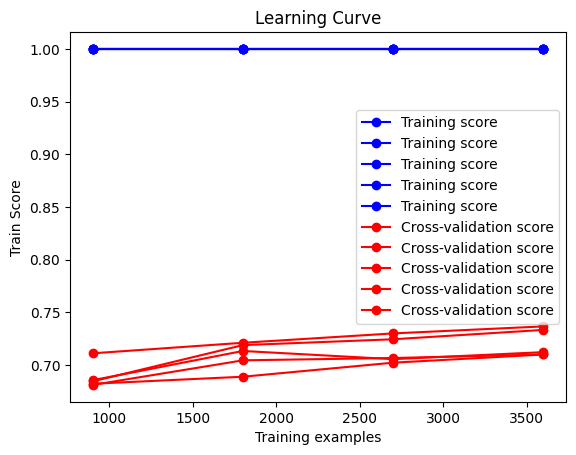

In [ ]:
plt.plot(train_sizes, train_scores, 'o-', color="b", label="Training score")
plt.plot(train_sizes, val_scores, 'o-', color="r", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Train Score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.show()

you can see how ugly and unorganized the plots are. So I calculate the mean of the each row of the arrays (axis=1) then for better visulasation, I calculate the standard deviation of them to see how they datas differ from the mean.

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

finally let's plot what we have done!
we plot the means and fill it's surrounding using **(mean -+ std)**! 🙂

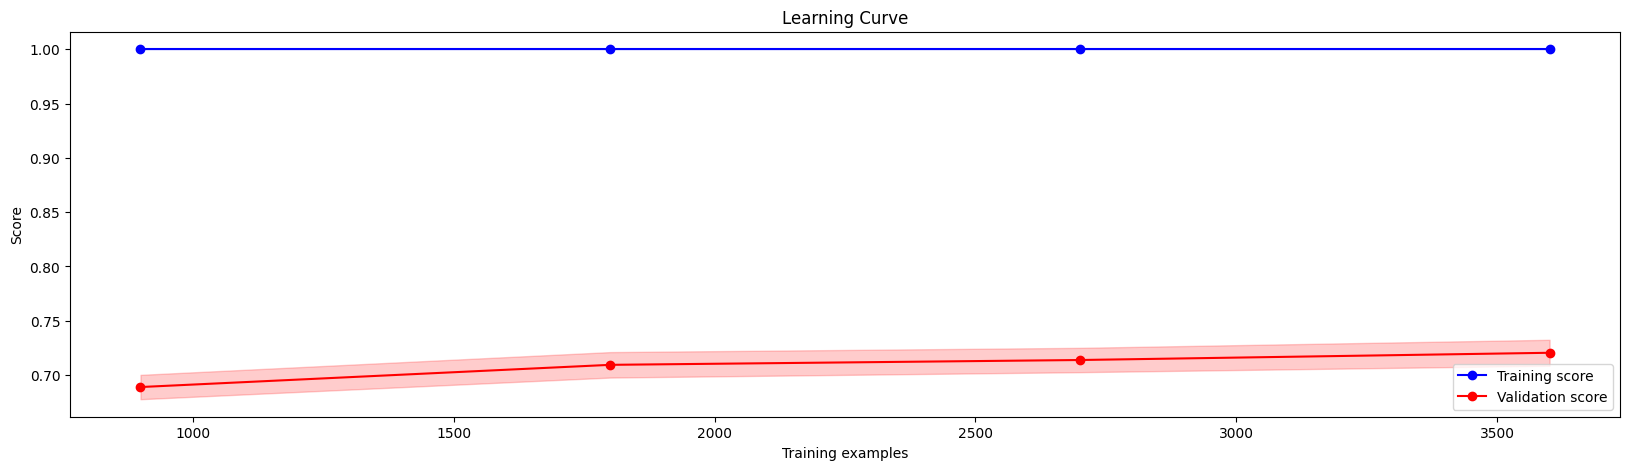

In [ ]:
plt.figure(figsize=(20, 5))
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="b")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="r")
plt.plot(train_sizes, train_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, val_mean, 'o-', color="r", label="Validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.show()

**great!** you can see as we are using a random forest (which is based on decistion tree) the model performs really well on the training sets (because we don't have a limited lenght and it tries to fully grow tree till it seperates each data and make correct group for them compeletly.


**but** one big problem of it is that our accuracy of the validation set will not be high enough as the tree has **overfited** to the training data. And we know that one simple way of solving an overfitted model is to feed more data to the model. So by increasing the data size, the model performs **slightly** better

now let's check it using the gradient boost.

first, some basic implementations of GradientBosstingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.20, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.6933333333333334


let's checkout what can be one of the best value for leaning_rate hyperparameters of this model!

In [ ]:
def find_best_learning_rate(X_train, y_train, X_val, y_val, learning_rate_values):
    best_learning_rate = None
    best_val_accuracy = 0
    best_model = None
    history = {'train': [], 'val': []}

    for lr in learning_rate_values:
        gb = GradientBoostingClassifier(learning_rate=lr, random_state=42)
        gb.fit(X_train, y_train)
        y_train_pred = gb.predict(X_train)
        training_accuracy = accuracy_score(y_train, y_train_pred)
        y_val_pred = gb.predict(X_val)
        validation_accuracy = accuracy_score(y_val, y_val_pred)
        history['train'].append(training_accuracy)
        history['val'].append(validation_accuracy)
        if validation_accuracy > best_val_accuracy:
            best_val_accuracy = validation_accuracy
            best_learning_rate = lr
            best_model = gb

    return best_learning_rate, best_model, best_val_accuracy, history


In [ ]:
X_train, X_rest, Y_train, Y_rest = train_test_split(X_data, Y_data, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_rest, Y_rest, test_size=0.5, random_state=42)

print("X_train size:" + '    ' + str(X_train.shape) )
print("X_val size:" + '      ' + str(X_val.shape) )
print("X_test size:" + '     ' + str(X_test.shape) )

X_train size:    (2700, 40)
X_val size:      (900, 40)
X_test size:     (900, 40)


Best Learning Rate: 0.5
Validation Accuracy with Best Model: 0.7167


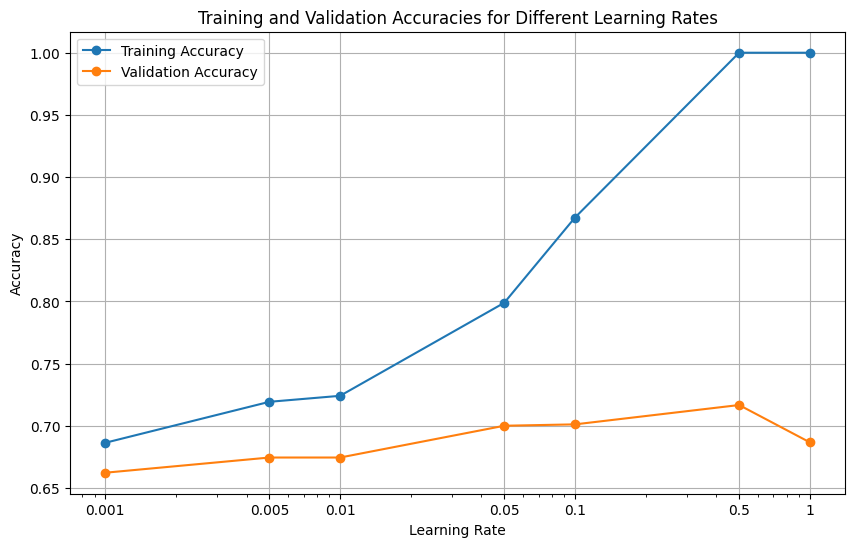

In [ ]:
learning_rate_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
best_learning_rate, best_model, best_accuracy, history = find_best_learning_rate(X_train, Y_train, X_val, Y_val, learning_rate_values)
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Validation Accuracy with Best Model: {best_accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values, history['train'], marker='o', label='Training Accuracy')
plt.plot(learning_rate_values, history['val'], marker='o', label='Validation Accuracy')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies for Different Learning Rates')
plt.xticks(learning_rate_values, [str(lr) for lr in learning_rate_values])
plt.legend()
plt.grid(True)
plt.show()


pretty interesting results!

what about the max_depth?

In [ ]:
def find_best_max_depth(X_train, y_train, X_val, y_val, max_depth_values):
    best_learning_rate = None
    best_val_accuracy = 0
    best_model = None
    history = {'train': [], 'val': []}

    for md in learning_rate_values:
        gb = GradientBoostingClassifier(max_depth=max_depth_values, random_state=42)
        gb.fit(X_train, y_train)
        y_train_pred = gb.predict(X_train)
        training_accuracy = accuracy_score(y_train, y_train_pred)
        y_val_pred = gb.predict(X_val)
        validation_accuracy = accuracy_score(y_val, y_val_pred)
        history['train'].append(training_accuracy)
        history['val'].append(validation_accuracy)
        if validation_accuracy > best_val_accuracy:
            best_val_accuracy = validation_accuracy
            best_learning_rate = md
            best_model = gb

    return best_learning_rate, best_model, best_val_accuracy, history


Best max depth: 1
Validation Accuracy with Best Model: 0.6867


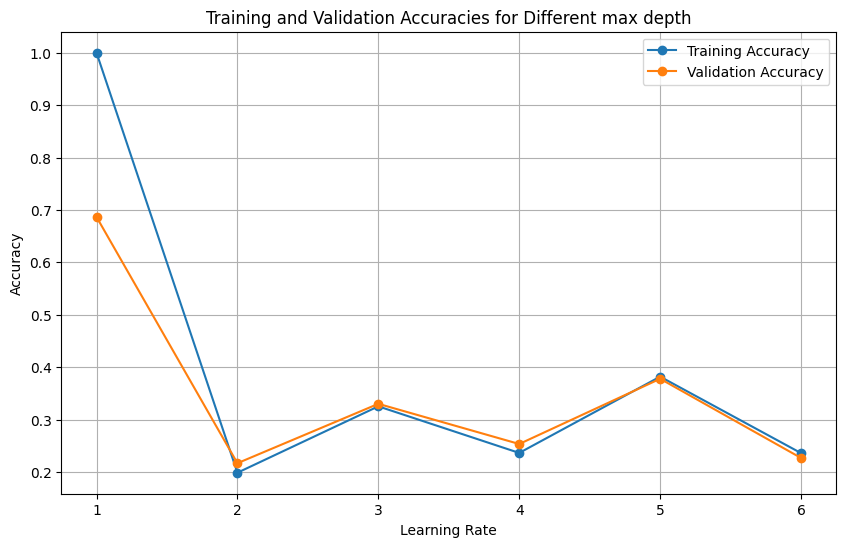

In [ ]:
max_depth_values = [1, 2, 3, 4, 5, 6]
best_learning_rate, best_model, best_accuracy, history = find_best_learning_rate(X_train, Y_train, X_val, Y_val, max_depth_values)
print(f"Best max depth: {best_learning_rate}")
print(f"Validation Accuracy with Best Model: {best_accuracy:.4f}")

# Plotting training and validation accuracies
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, history['train'], marker='o', label='Training Accuracy')
plt.plot(max_depth_values, history['val'], marker='o', label='Validation Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies for Different max depth')
plt.xticks(max_depth_values, [str(lr) for lr in max_depth_values])
plt.legend()
plt.grid(True)
plt.show()


[link text](https://)So after this fun observations, having a gradient boosting model with learning_rate of **0.5** and max depth of **1** can have a proper result! **maybe...**

In [ ]:
X_train, X_rest, Y_train, Y_rest = train_test_split(X_data, Y_data, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_rest, Y_rest, test_size=0.5, random_state=42)

print("X_train size:" + '   ' + str(X_train.shape) )
print("X_val size:" + '     ' + str(X_val.shape) )
print("X_test size:" + '    ' + str(X_test.shape) )

X_train size:   (2700, 40)
X_val size:     (900, 40)
X_test size:    (900, 40)


In [ ]:
gb = GradientBoostingClassifier(max_depth=1, learning_rate=0.5, random_state=42)
gb.fit(X_train, Y_train)
y_test_pred = gb.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("test accuracy is: " + str(test_accuracy))

test accuracy is: 0.6877777777777778


the reason why the model did not worked well on these parameters was that we once checked the best value of learning rate but with the **default** max_depth and the other time that we checked what could be the best max_depth, while the learning rate was **another default** value that our model had relied on it.

it was really interesting!

So let's find the best of these two parameters together using the GridSearchCV!

this may take 10 minutes!

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [1, 2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1, 0.5]
}
gb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, Y_train)
best_max_depth = grid_search.best_params_['max_depth']
best_learning_rate = grid_search.best_params_['learning_rate']
best_gb_model = grid_search.best_estimator_
print(f"Best Max Depth: {best_max_depth}")
print(f"Best Learning Rate: {best_learning_rate}")

Best Max Depth: 4
Best Learning Rate: 0.05


So we have found the best combination of max_depth and learning_rate.

Let's use a confusion matrix for better visualization and understaning.

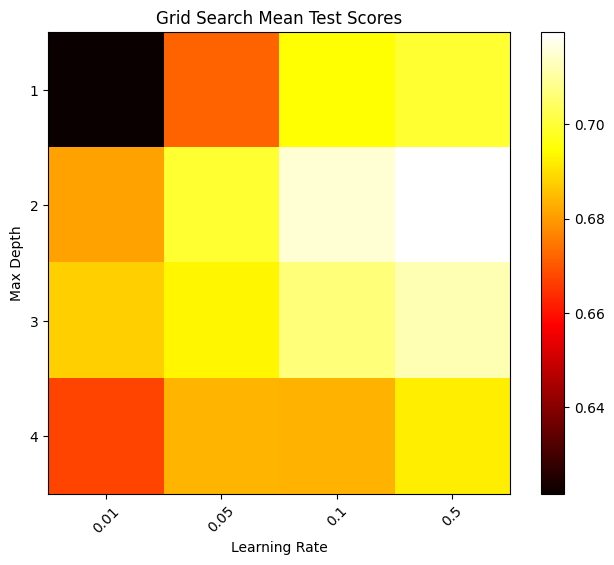

In [ ]:
results = grid_search.cv_results_
max_depth_values = param_grid['max_depth']
learning_rate_values = param_grid['learning_rate']
scores = np.array(results['mean_test_score']).reshape(len(max_depth_values), len(learning_rate_values))

plt.figure(figsize=(8, 6))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('Learning Rate')
plt.ylabel('Max Depth')
plt.colorbar()
plt.xticks(np.arange(len(learning_rate_values)), learning_rate_values, rotation=45)
plt.yticks(np.arange(len(max_depth_values)), max_depth_values)
plt.title('Grid Search Mean Test Scores')
plt.show()

now that we have found proper hyperparameters, let's checkout training the model using the **learning_curve**. I give all my data for better understanding of how increasing of data can help us

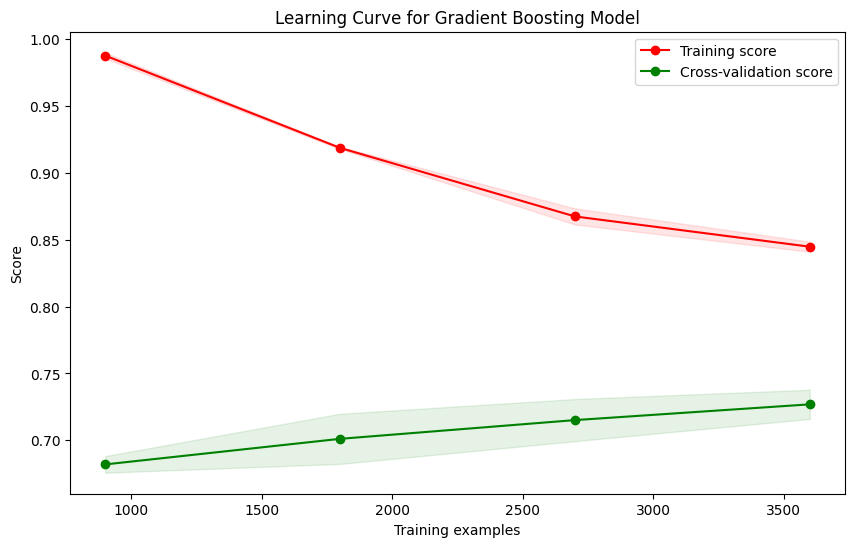

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_gb_model, X_data, Y_data, cv=5, n_jobs=-1,
    train_sizes=[0.25, 0.5, 0.75, 1], scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve for Gradient Boosting Model")
plt.show()


**Great!** We see that at first that our data wasn't that much, the train accuracy was high and the more data was fed into the model, the less our training accuracy is! It's because in **in gradient boosting the trees have limited max_depth (here it was 4 as we saw it had the best resaults) and by increasing the data, it can not have 100% accuracy on the trains set**. But you see how better the generalization is here and we have much better validation accuracy and increasing the data, leads to lower the overfiting problem.

#Q2

###a)

In [ ]:
ls

x.npy  y.npy


In [ ]:
cd ..

/content/drive/MyDrive/AI/ML-Fall2023/HW1


In [ ]:
ls

Q1/  Q2/


In [ ]:
cd Q2

/content/drive/MyDrive/AI/ML-Fall2023/HW1/Q2


In [ ]:
ls

Disease_symptom_and_patient_profile_dataset.csv


after locating the file, this time, we try to work with pandas as we have lots of tabular data.
**It's the fun part! Let's see how we make these strange data to appropriate data needed to be fed to the model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

loading the CSV file

In [ ]:
df = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')

first, let's display what we have

In [ ]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


OK, now we should deal with the categorical vaiables, one fun and very effective way can be transforming these categorical data to **one-hot encoding**  

**pd.get_dummies** does that for us

In [ ]:
df = pd.get_dummies(df, columns=['Disease', 'Gender', 'Blood Pressure', 'Cholesterol Level'], drop_first=True)


In [ ]:
df

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Outcome Variable,Disease_Allergic Rhinitis,Disease_Alzheimer's Disease,Disease_Anemia,Disease_Anxiety Disorders,...,Disease_Ulcerative Colitis,Disease_Urinary Tract Infection,Disease_Urinary Tract Infection (UTI),Disease_Williams Syndrome,Disease_Zika Virus,Gender_Male,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_Low,Cholesterol Level_Normal
0,Yes,No,Yes,Yes,19,Positive,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,No,Yes,Yes,No,25,Negative,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,No,Yes,Yes,No,25,Negative,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,Yes,Yes,No,Yes,25,Positive,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,Yes,Yes,No,Yes,25,Positive,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,Yes,No,Yes,No,80,Positive,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,Yes,No,Yes,No,85,Positive,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
346,Yes,No,Yes,No,85,Positive,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
347,Yes,No,Yes,No,90,Positive,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Great, now the only part remaining here is use binary_encoders for the "Yes/No" columns and also standardize the age column for having better data. at last, we encode the final Outcome Variables too!

In [ ]:
# binary encoding
binary_encoder = LabelEncoder()
df['Fever'] = binary_encoder.fit_transform(df['Fever'])
df['Cough'] = binary_encoder.fit_transform(df['Cough'])
df['Fatigue'] = binary_encoder.fit_transform(df['Fatigue'])
df['Difficulty Breathing'] = binary_encoder.fit_transform(df['Difficulty Breathing'])

# numerical standardazation
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

label_encoder = LabelEncoder()
df['Outcome Variable'] = label_encoder.fit_transform(df['Outcome Variable'])


let's see what we've done so far

In [ ]:
df

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Outcome Variable,Disease_Allergic Rhinitis,Disease_Alzheimer's Disease,Disease_Anemia,Disease_Anxiety Disorders,...,Disease_Ulcerative Colitis,Disease_Urinary Tract Infection,Disease_Urinary Tract Infection (UTI),Disease_Williams Syndrome,Disease_Zika Virus,Gender_Male,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_Low,Cholesterol Level_Normal
0,1,0,1,1,-2.091160,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,1,1,0,-1.631964,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,1,1,0,-1.631964,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1,1,0,1,-1.631964,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,1,1,0,1,-1.631964,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,1,0,1,0,2.577328,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,1,0,1,0,2.959991,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
346,1,0,1,0,2.959991,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
347,1,0,1,0,3.342654,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


very nice! now let's make use of the preprocessed data and create our X and Y variables. Finally, we split the data to train and test to be compeletly ready to use the data for model's training and testing

In [ ]:
X = df.drop('Outcome Variable', axis=1).values
y = df['Outcome Variable'].values

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

In [ ]:
X

array([[1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [ ]:
y

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("X_train.shape: " + str(X_train.shape))
print("X_val.shape: " + str(X_val.shape))
print("X_test.shape:  " + str(X_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape:  " + str(y_test.shape))
print("y_val.shape:  " + str(y_val.shape))


X_train.shape: (209, 125)
X_val.shape: (70, 125)
X_test.shape:  (70, 125)
y_train.shape: (209,)
y_test.shape:  (70,)
y_val.shape:  (70,)


In [ ]:
X_train

array([[0., 0., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 1., 0., ..., 0., 0., 1.]])

Now it's time to create our KNN class!
But before that, let's create the function that is used so frequently in the prediction of our KNN class

In [ ]:
import numpy as np

In [ ]:
def euclidean_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

our KNN class is simple, after initialization of it and setting the K variable, two main **fit** and **predict** functions do the rest of the work

In [ ]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        predictions = [self.single_predict(x) for x in X]
        return np.array(predictions)

    def single_predict(self, x):
        distances = [self.euclidean_dist(x, x_train) for x_train in self.X_train]
        k_near_neighbors_indices = np.argsort(distances)[:self.k]
        k_near_neighbor_labels = [self.y_train[i] for i in k_near_neighbors_indices]
        vote = np.bincount(k_near_neighbor_labels).argmax()
        return vote

    def euclidean_dist(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))


but let's explain and use the **np.bincount** used in our class

In [ ]:
arr = [1, 1, 1, 1, 2, 2, 3, 4, 4, 4]
print("occurrence of each number from 0 to max(arr)")
print(np.bincount(arr))

occurrence of each number from 0 to max(arr)
[0 4 2 1 3]


now let's find the best value for k between 1 to 20!

so we train a model for each of them and finally test it using the test set

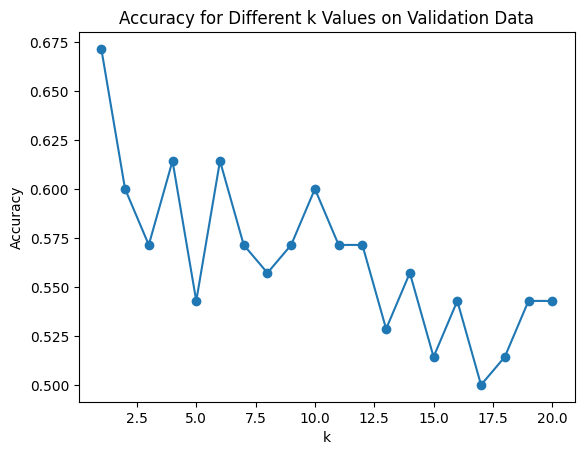

Best k on Validation Data: 1
Validation Accuracy with Best k: 0.6714
test Accuracy with Best k: 0.7429


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

best_k = None
best_model = None
best_accuracy = 0
k_values = list(range(1, 21))
accuracy_scores = []

for k in k_values:
    knn_model = KNN(k=k)
    knn_model.fit(X_train, y_train)
    y_val_pred = knn_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracy_scores.append(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_model = knn_model

plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy for Different k Values on Validation Data')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

print(f"Best k on Validation Data: {best_k}")
print(f"Validation Accuracy with Best k: {best_accuracy:.4f}")

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"test Accuracy with Best k: {test_accuracy:.4f}")

pretty interesting! It seems that as we are using one-hot encoding for all of our parameters, k=1 leads to the most accuarate and only the nearest symptoms can handle the situation better than other!

b)

#### ROC curve which is also called Receiver Operating Characteristic curve, is a graphical representation of the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) for a binary classification system.

#### first, it calculates two parts:
#### 1- True Positive Rate (Sensitivity): True Positives / (True Positives + False Negatives)

####2- False Positive Rate (1 - Specificity):  False Positives / (True Negatives + False Positives)

### Using the two provided parameters, it can be a pretty nice way to **Visualy** compare two model's performance and also helps for setting some hyperparameter thresholds based on our **usage**. Also, when there are imbalanced datasets, "accuracy" can not be such a good metric and ROC and other evaluating metrics are used often.

first, we implement a new function to out KNN model to have a kind of probability of the outcome

In [ ]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        predictions = [self.single_predict(x) for x in X]
        return np.array(predictions)

    def single_predict(self, x):
        distances = [self.euclidean_dist(x, x_train) for x_train in self.X_train]
        k_near_neighbors_indices = np.argsort(distances)[:self.k]
        k_near_neighbor_labels = [self.y_train[i] for i in k_near_neighbors_indices]
        vote = np.bincount(k_near_neighbor_labels).argmax()
        return vote

    def euclidean_dist(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def single_predict_proba(self, x):
      distances = [self.euclidean_dist(x, x_train) for x_train in self.X_train]
      k_near_neighbors_indices = np.argsort(distances)[:self.k]
      k_near_neighbor_labels = [self.y_train[i] for i in k_near_neighbors_indices]
      return np.mean(k_near_neighbor_labels)


then we use the roc_curve and auc of sklearn.metrics

In [ ]:
print("X_train shape: " + str(X_train.shape))
print("X_val shape: " + str(X_val.shape))
print("X_test shape: " + str(X_test.shape))

print("y_train shape: " + str(y_train.shape))
print("y_val shape: " + str(y_val.shape))
print("y_test shape: " + str(y_test.shape))

X_val

X_train shape: (209, 125)
X_val shape: (70, 125)
X_test shape: (70, 125)
y_train shape: (209,)
y_val shape: (70,)
y_test shape: (70,)


array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

knn_model = KNN(3)
knn_model.fit(X_train, y_train)
y_val_scores = np.array([knn_model.single_predict_proba(x) for x in X_val])

In [ ]:
y_val_scores

array([0.33333333, 0.        , 0.33333333, 0.33333333, 0.33333333,
       0.66666667, 0.        , 0.66666667, 0.        , 1.        ,
       0.66666667, 0.33333333, 0.66666667, 1.        , 0.66666667,
       0.33333333, 1.        , 0.66666667, 0.66666667, 0.33333333,
       0.        , 0.33333333, 0.        , 0.66666667, 0.        ,
       0.33333333, 1.        , 1.        , 0.        , 0.        ,
       0.33333333, 0.66666667, 0.        , 0.66666667, 1.        ,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.66666667,
       0.33333333, 0.        , 1.        , 0.33333333, 0.        ,
       1.        , 0.33333333, 1.        , 0.66666667, 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 0.33333333,
       1.        , 0.66666667, 0.66666667, 1.        , 1.        ,
       1.        , 0.        , 0.66666667, 0.        , 0.33333333,
       0.33333333, 0.66666667, 0.        , 0.33333333, 0.66666667])

so you can see now the probability have been used (a simple version that is using the mean of k votes!)

**The good point is as the are only between 0 and 1, we do not need to scale the results!**

after that we use the **roc_curve** function and for understanding out model's performance, we use the auc (Area Under the Curve) function that calculates the area under the ROC curve

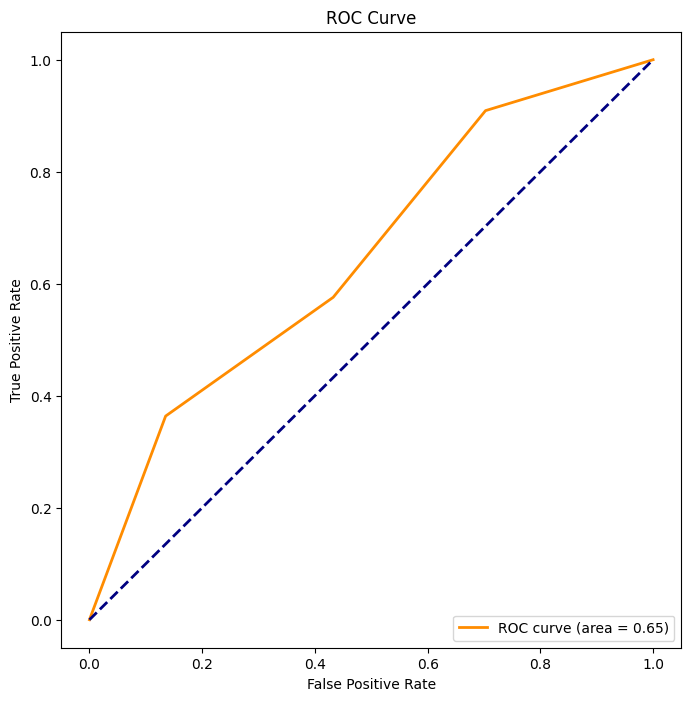

In [ ]:
false_positive_rate, true_positive_rate , thresholds = roc_curve(y_val, y_val_scores)
roc_auc = auc(false_positive_rate, true_positive_rate )

plt.figure(figsize=(8, 8))
plt.plot(false_positive_rate, true_positive_rate , color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

so the AUC is 0.65 for k=3!
for better understanding of classification models checkout these:


*   AUC = 0.5: Random classifier (no discrimination between positive and negative classes).
*   AUC < 0.5: Worse than random (inverted classifier).
*   0.5 < AUC < 1: Better than random.
*   AUC = 1: Perfect classifier!  🙂

so totaly we know that using the KNN model that we have created with k=3 can not perform really well on the predictions.

be careful that for example if we want to be more careful about possible diagnosis of the disease, we should pay more attention to the **True Positive Rate** and ..

####But before finishing let's see what would our model be if we use k=1 (which we previously proved that k=1 is better for this situation)

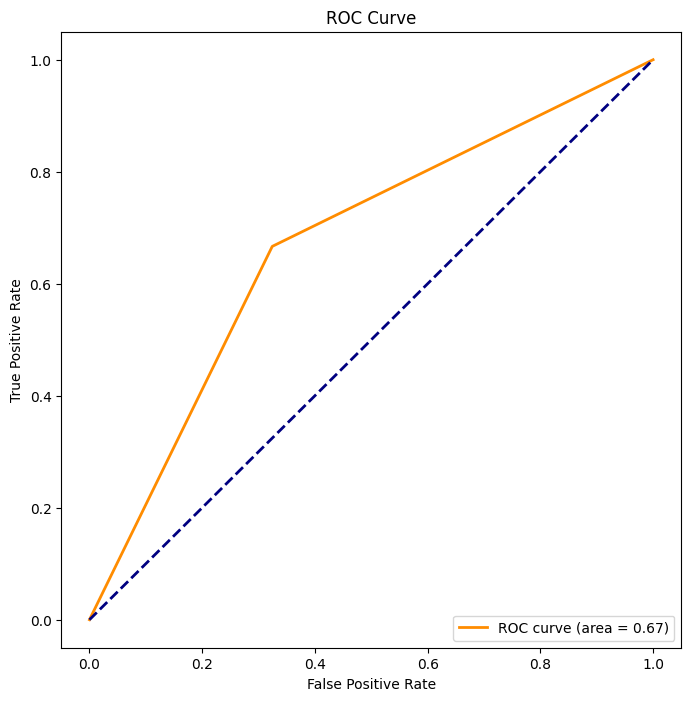

In [ ]:
knn_model = KNN(best_k) #k=1
knn_model.fit(X_train, y_train)
y_val_scores = np.array([knn_model.single_predict_proba(x) for x in X_val])
false_positive_rate, true_positive_rate , thresholds = roc_curve(y_val, y_val_scores)
roc_auc = auc(false_positive_rate, true_positive_rate )

plt.figure(figsize=(8, 8))
plt.plot(false_positive_rate, true_positive_rate , color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

great! the ROC curve proves that too! (k=1: ROC = 0.67 > 0.65 = ROC :3=k)

#Well that's the end of this assignment. Bye bye! 😃